<div style="text-align: left; background-color:#4b94cf; font-family: bodoni; color:white; padding: 10px; margin-bottom: 0em; text-align: center; font-size: 48px;">Big basket EDA by rmd </div>

**E-commerce** (electronic commerce) is the activity of electronically buying or selling of products on online services or over the Internet. E-commerce draws on technologies such as mobile commerce, electronic funds transfer, supply chain management, Internet marketing, online transaction processing, electronic data interchange (EDI), inventory management systems, and automated data collection systems. E-commerce is in turn driven by the technological advances of the semiconductor industry, and is the largest sector of the electronics industry.

![](https://img.freepik.com/free-vector/online-shopping-banner-mobile-app-templates-concept-flat-design_1150-34865.jpg?w=740&t=st=1659930109~exp=1659930709~hmac=1df6da9d4f62478113772068daa95cf21428910736485939e6b09f7ad501fbcd)

# About the dataset:

Bigbasket is the largest online grocery supermarket in India. Was launched somewhere around in 2011 since then they've been expanding their business. Though some new competitors have been able to set their foot in the nation such as Blinkit etc. but BigBasket has still not loose anything - thanks to ever expanding popular base and their shift to online buying.

# Features of the dataset:

It contains
* Index
* Product name
* Category
* Sub-category
* Brand of the product
* Sale price 
* Type
* Rating (out of 5)
* Small description of the product

Let's start our work with importing necessary libraries and the dataset!

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

plt.style.use("Solarize_Light2")
#sns.set_palette("dark")
#sns.set_style("ticks")

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
bigbasket =pd.read_csv("../input/bigbasket-entire-product-list-28k-datapoints/BigBasket Products.csv")
bigbasket.head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


In [3]:
bigbasket.describe()

,index,sale_price,market_price,rating
count,27555.00000,27555.000000,27555.000000,18929.000000
mean,13778.00000,322.514808,382.056664,3.943410
std,7954.58767,486.263116,581.730717,0.739063
min,1.00000,2.450000,3.000000,1.000000
25%,6889.50000,95.000000,100.000000,3.700000
50%,13778.00000,190.000000,220.000000,4.100000
75%,20666.50000,359.000000,425.000000,4.300000
max,27555.00000,12500.000000,12500.000000,5.000000


In [4]:
bigbasket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         27555 non-null  int64  
 1   product       27554 non-null  object 
 2   category      27555 non-null  object 
 3   sub_category  27555 non-null  object 
 4   brand         27554 non-null  object 
 5   sale_price    27555 non-null  float64
 6   market_price  27555 non-null  float64
 7   type          27555 non-null  object 
 8   rating        18929 non-null  float64
 9   description   27440 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 2.1+ MB


<div style="text-align: left; background-color:#4b94cf; font-family: bodoni; color:white; padding: 10px; margin-bottom: 0em; text-align: center; font-size: 28px;">Top & least sold products</div>

**Top and least sold products**

In [5]:
top = bigbasket["product"].value_counts().head(15)
least=bigbasket["product"].value_counts().tail(15)

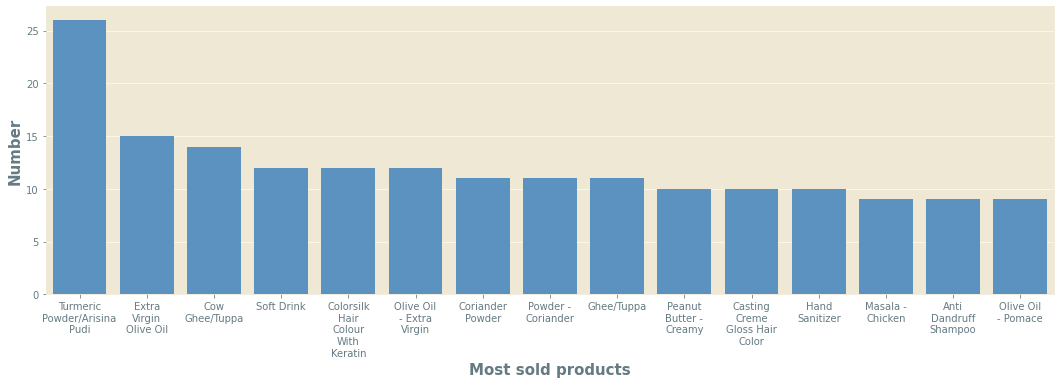

In [6]:
fig = plt.figure(figsize=(14,4))
ax = fig.add_axes([0,0,1,1])

import textwrap
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

    


sns.barplot(x=top.index, y=top.values, data=bigbasket,
            linewidth=0,
            alpha=1.0,
            color="#4b94cf")

#format axis
ax.set_xlabel("Most sold products",fontsize=15, weight='semibold')
ax.set_ylabel("Number",fontsize=15, weight='semibold')

wrap_labels(ax, 10)

plt.show()

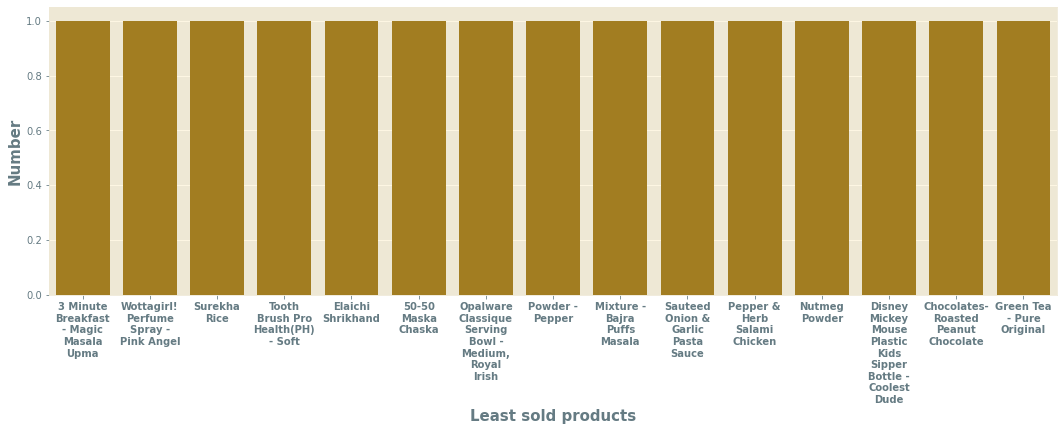

In [7]:
fig = plt.figure(figsize=(14,4))
ax = fig.add_axes([0,0,1,1])

sns.barplot(x=least.index, y=least.values, data=bigbasket, linewidth=0, alpha=1.0, color="darkgoldenrod")
sns.set(style="ticks")

#format axis
ax.set_xlabel("Least sold products",fontsize=15, weight='semibold')
ax.set_ylabel("Number",fontsize=15, weight='semibold')
plt.xticks(fontsize=10, weight="semibold")


wrap_labels(ax, 10)
fig.show()

Through the plots of most and least sold products, we get to know that 
* Indians have a trend to purchase different types of oils and ghee. 
* Turmeric and coriander are the most used spices in indian cuisine. On the other hand, Nutmeg and pepper powder are used in scarce amounts.  
* Hand santizer is one of the highest sold products most probably due to covid-19 pandemic.
* Indians are very keen about haircare as we see hair color, shampoo and oils in the highest selling products.
* Raw spices like turmeric are preferred on masala mixtures.


In [8]:
bigbasket.head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


**Top and least sold Categories**

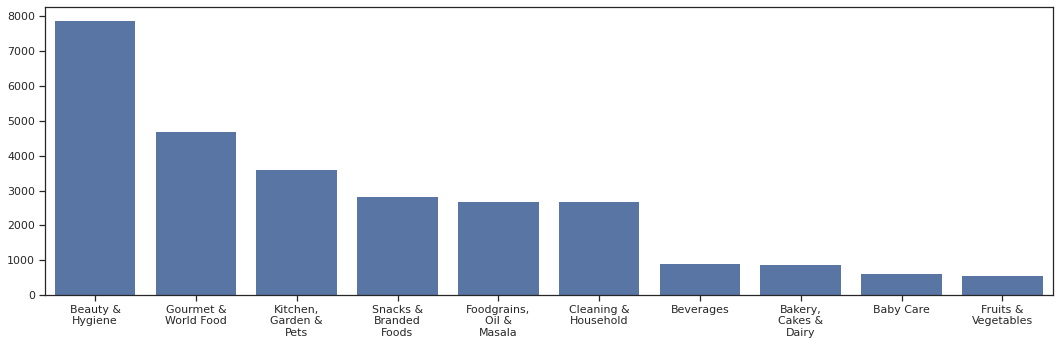

In [9]:
fig = plt.figure(figsize=(14,4))
ax2 = fig.add_axes([0,0,1,1])

sns.barplot(x=bigbasket["category"].value_counts()[:10].index, y=bigbasket["category"].value_counts()[:10].values,
            data=bigbasket, linewidth=0,
            alpha=1.0,
            color="b")

wrap_labels(ax2,10)

<div style="text-align: left; background-color:#4b94cf; font-family: bodoni; color:white; padding: 10px; margin-bottom: 0em; text-align: center; font-size: 28px;">Effect of discounted prices
  </div>

Lets check which items can be bought at discounted price from Big basket. For this, we will add another feature "diff_in_prices" measuring discount on a certain item.

In [10]:
bigbasket["diff_in_prices"] = bigbasket["market_price"] - bigbasket["sale_price"]
#bigbasket.head()
discount = bigbasket[bigbasket["diff_in_prices"] != 0]
discount

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description,diff_in_prices
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.00,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m...",131.00
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.00,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...,27.00
5,6,Germ - Removal Multipurpose Wipes,Cleaning & Household,All Purpose Cleaners,Nature Protect,169.00,199.0,Disinfectant Spray & Cleaners,3.3,Stay protected from contamination with Multipu...,30.00
10,11,Wheat Grass Powder - Raw,Gourmet & World Food,Cooking & Baking Needs,NUTRASHIL,261.00,290.0,Flours & Pre-Mixes,4.0,Wheatgrass is a superfood potent health food w...,29.00
15,16,Dove Plastic Soap Case - Assorted Colour,Cleaning & Household,Bins & Bathroom Ware,Nakoda,49.00,59.0,Soap Cases & Dispensers,4.0,This soap case is made of virgin plastic which...,10.00
...,...,...,...,...,...,...,...,...,...,...,...
27546,27547,Organic Powder - Garam Masala,"Foodgrains, Oil & Masala",Organic Staples,Organic Tattva,152.00,160.0,Organic Masalas & Spices,4.2,Organic Tattva Garam masala is a famous spice ...,8.00
27550,27551,"Wottagirl! Perfume Spray - Heaven, Classic",Beauty & Hygiene,Fragrances & Deos,Layerr,199.20,249.0,Perfume,3.9,Layerr brings you Wottagirl Classic fragrant b...,49.80
27551,27552,Rosemary,Gourmet & World Food,Cooking & Baking Needs,Puramate,67.50,75.0,"Herbs, Seasonings & Rubs",4.0,Puramate rosemary is enough to transform a dis...,7.50
27553,27554,Green Tea - Pure Original,Beverages,Tea,Tetley,396.00,495.0,Tea Bags,4.2,"Tetley Green Tea with its refreshing pure, ori...",99.00


In [11]:
#sns.boxplot(bigbasket['market_price'], showmeans=True)
#sns.boxplot(discount['market_price'], showmeans=True, color='r')

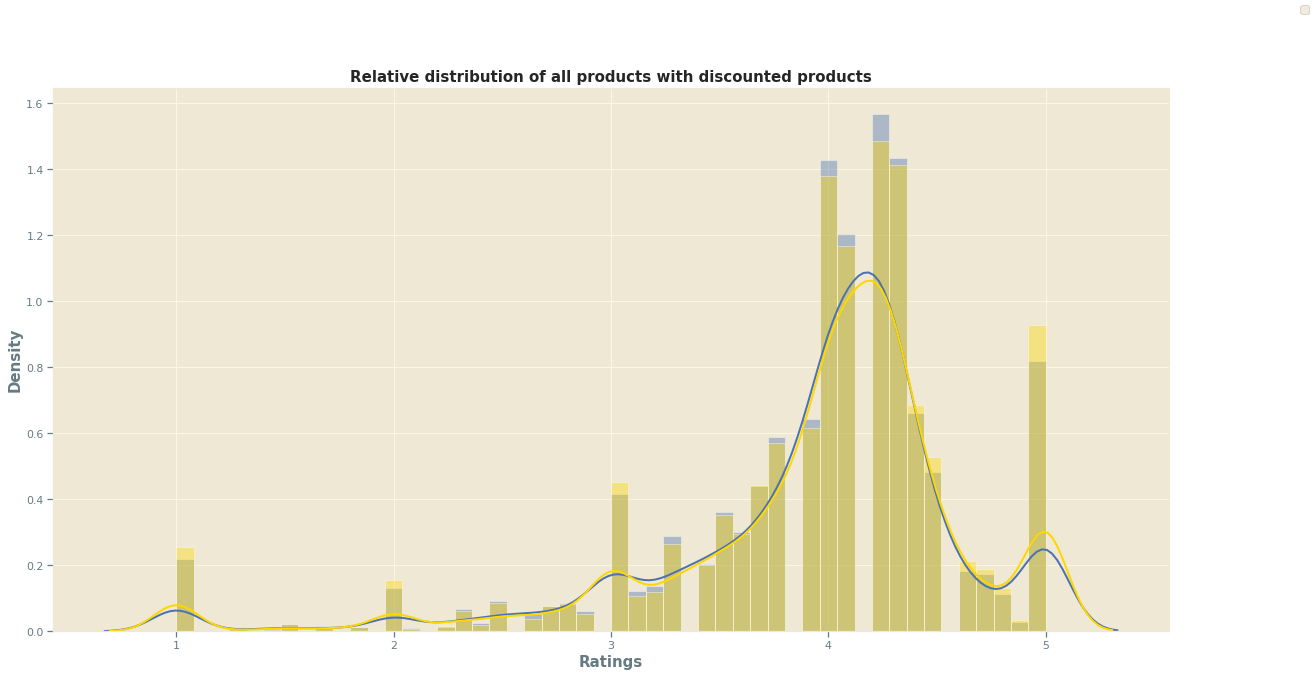

In [12]:
fig = plt.figure(figsize=(20,10))

plt.style.use("Solarize_Light2")
sns.distplot(discount.rating, color='b', kde =True)
sns.distplot(bigbasket.rating, color='gold', kde =True)
plt.xlabel("Ratings",fontsize=15, weight='semibold')
plt.ylabel("Density",fontsize=15, weight='semibold')
plt.title("Relative distribution of all products with discounted products",fontsize=15, weight='semibold')
fig.legend()

In the above graph, yellow color specifies rating of all the items, whereas blue color denotes the ratings of the items on which some discount has been offered. As we see, 
> the offered discounts showed a **little increase in purchase of items with 3.0 to 4.2 ratings**. Otherwise, discounts helped no increase in purchase. Another interesting observation was that **the highest rated products (4.5 to 5) with no discount exceeded the rate of purchase of discounted products**. It means the customers if provided with high quality products which satisfy them, will buy the products no matter discount is offered or not.

<div style="text-align: left; background-color:#4b94cf; font-family: bodoni; color:white; padding: 10px; margin-bottom: 0em; text-align: center; font-size: 28px;">EDA of high rated products (more than 4 rating)</div>

In [13]:
highrated = bigbasket.query('rating > 4', inplace=False)
print("Number of products with more than 4 rating is",highrated.shape[0])

Number of products with more than 4 rating is 10264


In [14]:
highrated.head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description,diff_in_prices
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...,0.0
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...,0.0
9,10,"Scrub Pad - Anti- Bacterial, Regular",Cleaning & Household,"Mops, Brushes & Scrubs",Scotch brite,20.0,20.0,"Utensil Scrub-Pad, Glove",4.3,Scotch Brite Anti- Bacterial Scrub Pad thoroug...,0.0
12,13,"Face Wash - Oil Control, Active",Beauty & Hygiene,Skin Care,Oxy,110.0,110.0,Face Care,5.0,This face wash deeply cleanses dirt and impuri...,0.0
14,15,Just Spray - Mosquito Repellent Room Spray,Cleaning & Household,Fresheners & Repellents,Herbal Strategi,200.0,200.0,Mosquito Repellent,4.2,Strategi Just Spray is a very effective 100% H...,0.0


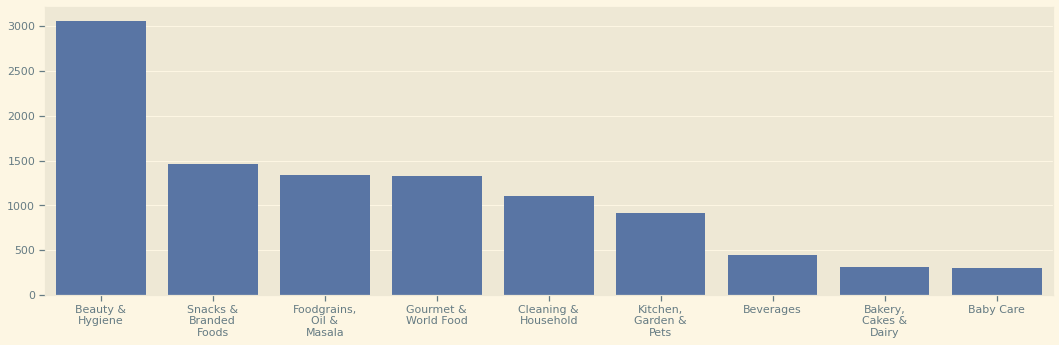

In [15]:
fig = plt.figure(figsize=(14,4))
ax2 = fig.add_axes([0,0,1,1])

sns.barplot(x=highrated["category"].value_counts()[:10].index, y=highrated["category"].value_counts()[:10].values,
            data=highrated, linewidth=0,
            alpha=1.0,
            color="b")

wrap_labels(ax2,10)

# Work in process!
<div style="border-radius:10px;
            border :#0A0104 solid;
            padding: 15px;
            background-color:#FFF0F5   ;
           font-size:110%;
            text-align: left">Do upvote and comment if you like my efforts. Any constructive addition or suggestion is highly welcomed.